In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # For progress bars


In [ ]:
def simulate_game(n_friends, n_turns=1000, dice_faces=6):
    """
    Simulates a drinking game where each friend rolls a die and may drink based on the state of glasses.

    Parameters:
    - n_friends (int): Number of friends playing the game.
    - n_turns (int): Number of turns in the game.
    - dice_faces (int): Number of faces on the die.

    Returns:
    - shots_matrix (np.ndarray): A matrix recording the number of shots each friend takes per turn.
    """
    # Input validation
    if n_friends <= 0 or n_turns <= 0 or dice_faces <= 0:
        raise ValueError("Number of friends, turns, and dice faces must be positive integers.")

    shots_matrix = np.zeros((n_turns, n_friends), dtype=int)
    glasses = np.zeros(dice_faces, dtype=int)  # 0 indicates empty, 1 indicates full

    for turn in range(n_turns):
        for friend in range(n_friends):
            turn_shots = 0
            roll = np.random.randint(0, dice_faces)  # Dice roll (0 to dice_faces - 1)
            while glasses[roll] == 1:
                turn_shots += 1
                glasses[roll] = 0  # Drink the glass
                roll = np.random.randint(0, dice_faces)  # Roll again
            glasses[roll] = 1  # Fill the empty glass and end turn

            shots_matrix[turn, friend] = turn_shots

    return shots_matrix

In [ ]:
def plot_individual_histograms(shots_matrix_high, shots_matrix_low, n_friends):
    """
    Plots histograms comparing the distribution of shots per friend between high and low round simulations.

    Parameters:
    - shots_matrix_high (np.ndarray): Shots matrix from the high rounds simulation.
    - shots_matrix_low (np.ndarray): Shots matrix from the low rounds simulation.
    - n_friends (int): Number of friends.
    """
    fig, axs = plt.subplots(n_friends, 2, figsize=(15, 5 * n_friends), sharex=True)
    max_shots = max(shots_matrix_high.max(), shots_matrix_low.max())
    bins = np.arange(0, max_shots + 2) - 0.5  # Dynamic bins based on maximum shots

    for friend in range(n_friends):
        # High number of rounds
        friend_shots_high = shots_matrix_high[:, friend]
        counts_high, _, _ = axs[friend, 0].hist(friend_shots_high, bins=bins, edgecolor='black', alpha=0.75)
        mean_high = np.mean(friend_shots_high)
        std_dev_high = np.std(friend_shots_high)
        counts_percentage_high = (counts_high / len(friend_shots_high)) * 100  # Convert counts to percentages
        for i in range(len(counts_high)):
            if counts_high[i] > 0:
                axs[friend, 0].text(bins[i] + 0.5, counts_high[i] + 0.5,
                                    f'{counts_percentage_high[i]:.1f}%', ha='center')
        axs[friend, 0].set_title(f'High Rounds - Friend {friend + 1}\nMean: {mean_high:.2f}, SD: {std_dev_high:.2f}')
        axs[friend, 0].set_xlabel('Number of Shots')
        axs[friend, 0].set_ylabel('Frequency')
        axs[friend, 0].set_xticks(range(int(bins[0] + 0.5), int(bins[-1] + 0.5)))
        axs[friend, 0].set_xlim(bins[0], bins[-1])
        axs[friend, 0].set_ylim(0, counts_high.max() * 1.1)

        # Low number of rounds
        friend_shots_low = shots_matrix_low[:, friend]
        counts_low, _, _ = axs[friend, 1].hist(friend_shots_low, bins=bins, edgecolor='black', alpha=0.75)
        mean_low = np.mean(friend_shots_low)
        std_dev_low = np.std(friend_shots_low)
        counts_percentage_low = (counts_low / len(friend_shots_low)) * 100  # Convert counts to percentages
        for i in range(len(counts_low)):
            if counts_low[i] > 0:
                axs[friend, 1].text(bins[i] + 0.5, counts_low[i] + 0.5,
                                    f'{counts_percentage_low[i]:.1f}%', ha='center')
        axs[friend, 1].set_title(f'Low Rounds - Friend {friend + 1}\nMean: {mean_low:.2f}, SD: {std_dev_low:.2f}')
        axs[friend, 1].set_xlabel('Number of Shots')
        axs[friend, 1].set_ylabel('Frequency')
        axs[friend, 1].set_xticks(range(int(bins[0] + 0.5), int(bins[-1] + 0.5)))
        axs[friend, 1].set_xlim(bins[0], bins[-1])
        axs[friend, 1].set_ylim(0, counts_low.max() * 1.1)

    plt.tight_layout()
    plt.show()

In [ ]:
def calculate_sd_per_round(n_friends, n_turns):
    """
    Calculates the standard deviation of shots per round among friends over time.

    Parameters:
    - n_friends (int): Number of friends.
    - n_turns (int): Number of turns.

    Returns:
    - std_devs (np.ndarray): Standard deviations per round.
    """
    shots_matrix = simulate_game(n_friends, n_turns)
    cumulative_shots = np.cumsum(shots_matrix, axis=0)
    round_numbers = np.arange(1, n_turns + 1).reshape(-1, 1)
    cumulative_shots_per_round = cumulative_shots / round_numbers
    std_devs = np.std(cumulative_shots_per_round, axis=1)
    return std_devs

In [ ]:
def simulate_sd_over_time(n_friends, n_turns, n_simulations):
    """
    Simulates the standard deviation of shots per round over multiple simulations.

    Parameters:
    - n_friends (int): Number of friends.
    - n_turns (int): Number of turns.
    - n_simulations (int): Number of simulations to perform.

    Returns:
    - all_sd_per_round (np.ndarray): Array of standard deviations per round for all simulations.
    """
    all_sd_per_round = np.zeros((n_simulations, n_turns))

    print("Calculating standard deviation per round over simulations...")
    for i in tqdm(range(n_simulations)):
        all_sd_per_round[i, :] = calculate_sd_per_round(n_friends, n_turns)

    return all_sd_per_round

In [ ]:
def plot_sd_fanchart(all_sd_per_round):
    """
    Plots a fanchart of the standard deviation of shots per round.

    Parameters:
    - all_sd_per_round (np.ndarray): Array of standard deviations per round for all simulations.
    """
    average_sd_per_round = np.mean(all_sd_per_round, axis=0)

    plt.figure(figsize=(12, 6))
    for i in range(all_sd_per_round.shape[0]):
        plt.plot(all_sd_per_round[i, :], color='blue', alpha=0.05)
    plt.plot(average_sd_per_round, color='red', linewidth=2, label='Average SD/Round')
    plt.xlabel('Number of Rounds')
    plt.ylabel('SD/Round')
    plt.title('Fanchart of the SD of Shots/Round for the Friends (Log Scale)')
    plt.xscale('log')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def simulate_average_shots_per_friend(n_friends, n_turns, n_simulations):
    """
    Simulates and calculates the average shots per turn per friend over multiple simulations.

    Parameters:
    - n_friends (int): Number of friends.
    - n_turns (int): Number of turns.
    - n_simulations (int): Number of simulations to perform.

    Returns:
    - average_mean_shots_per_round (np.ndarray): Average mean shots per round for each friend.
    """
    sum_mean_shots_per_round = np.zeros((n_turns, n_friends))

    print("Calculating average shots per turn per friend over simulations...")
    for i in tqdm(range(n_simulations)):
        shots_matrix = simulate_game(n_friends, n_turns)
        cumulative_shots = np.cumsum(shots_matrix, axis=0)
        mean_shots_per_round = cumulative_shots / np.arange(1, n_turns + 1).reshape(-1, 1)
        sum_mean_shots_per_round += mean_shots_per_round

    average_mean_shots_per_round = sum_mean_shots_per_round / n_simulations

    return average_mean_shots_per_round

In [ ]:
def plot_average_shots_per_friend(average_mean_shots_per_round, n_friends):
    """
    Plots the average shots per turn for each friend over time.

    Parameters:
    - average_mean_shots_per_round (np.ndarray): Average mean shots per round for each friend.
    - n_friends (int): Number of friends.
    """
    plt.figure(figsize=(12, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, n_friends))  # Generate a range of colors

    for friend in range(n_friends):
        plt.plot(average_mean_shots_per_round[:, friend], label=f'Friend {friend + 1}', color=colors[friend])

    plt.xlabel('Number of Rounds')
    plt.ylabel('Average Shots per Turn')
    plt.title('Average Shots per Turn per Friend over Simulations')
    plt.xscale('log')
    plt.legend()
    plt.tight_layout()
    plt.show()

Example simulation with 10 friends over 10 rounds:
[[0 1 0 1 0 0 0 1 3 1]
 [0 2 1 2 1 1 1 1 0 1]
 [1 0 1 0 3 1 0 2 2 1]
 [0 0 2 0 2 0 1 0 1 1]
 [3 1 0 0 0 2 2 1 0 3]
 [2 0 2 2 0 0 0 1 0 1]
 [1 3 1 1 2 0 0 0 1 2]
 [1 2 2 1 0 1 0 0 4 0]
 [0 0 1 2 0 2 2 0 2 1]
 [0 0 4 1 1 0 1 1 0 0]]


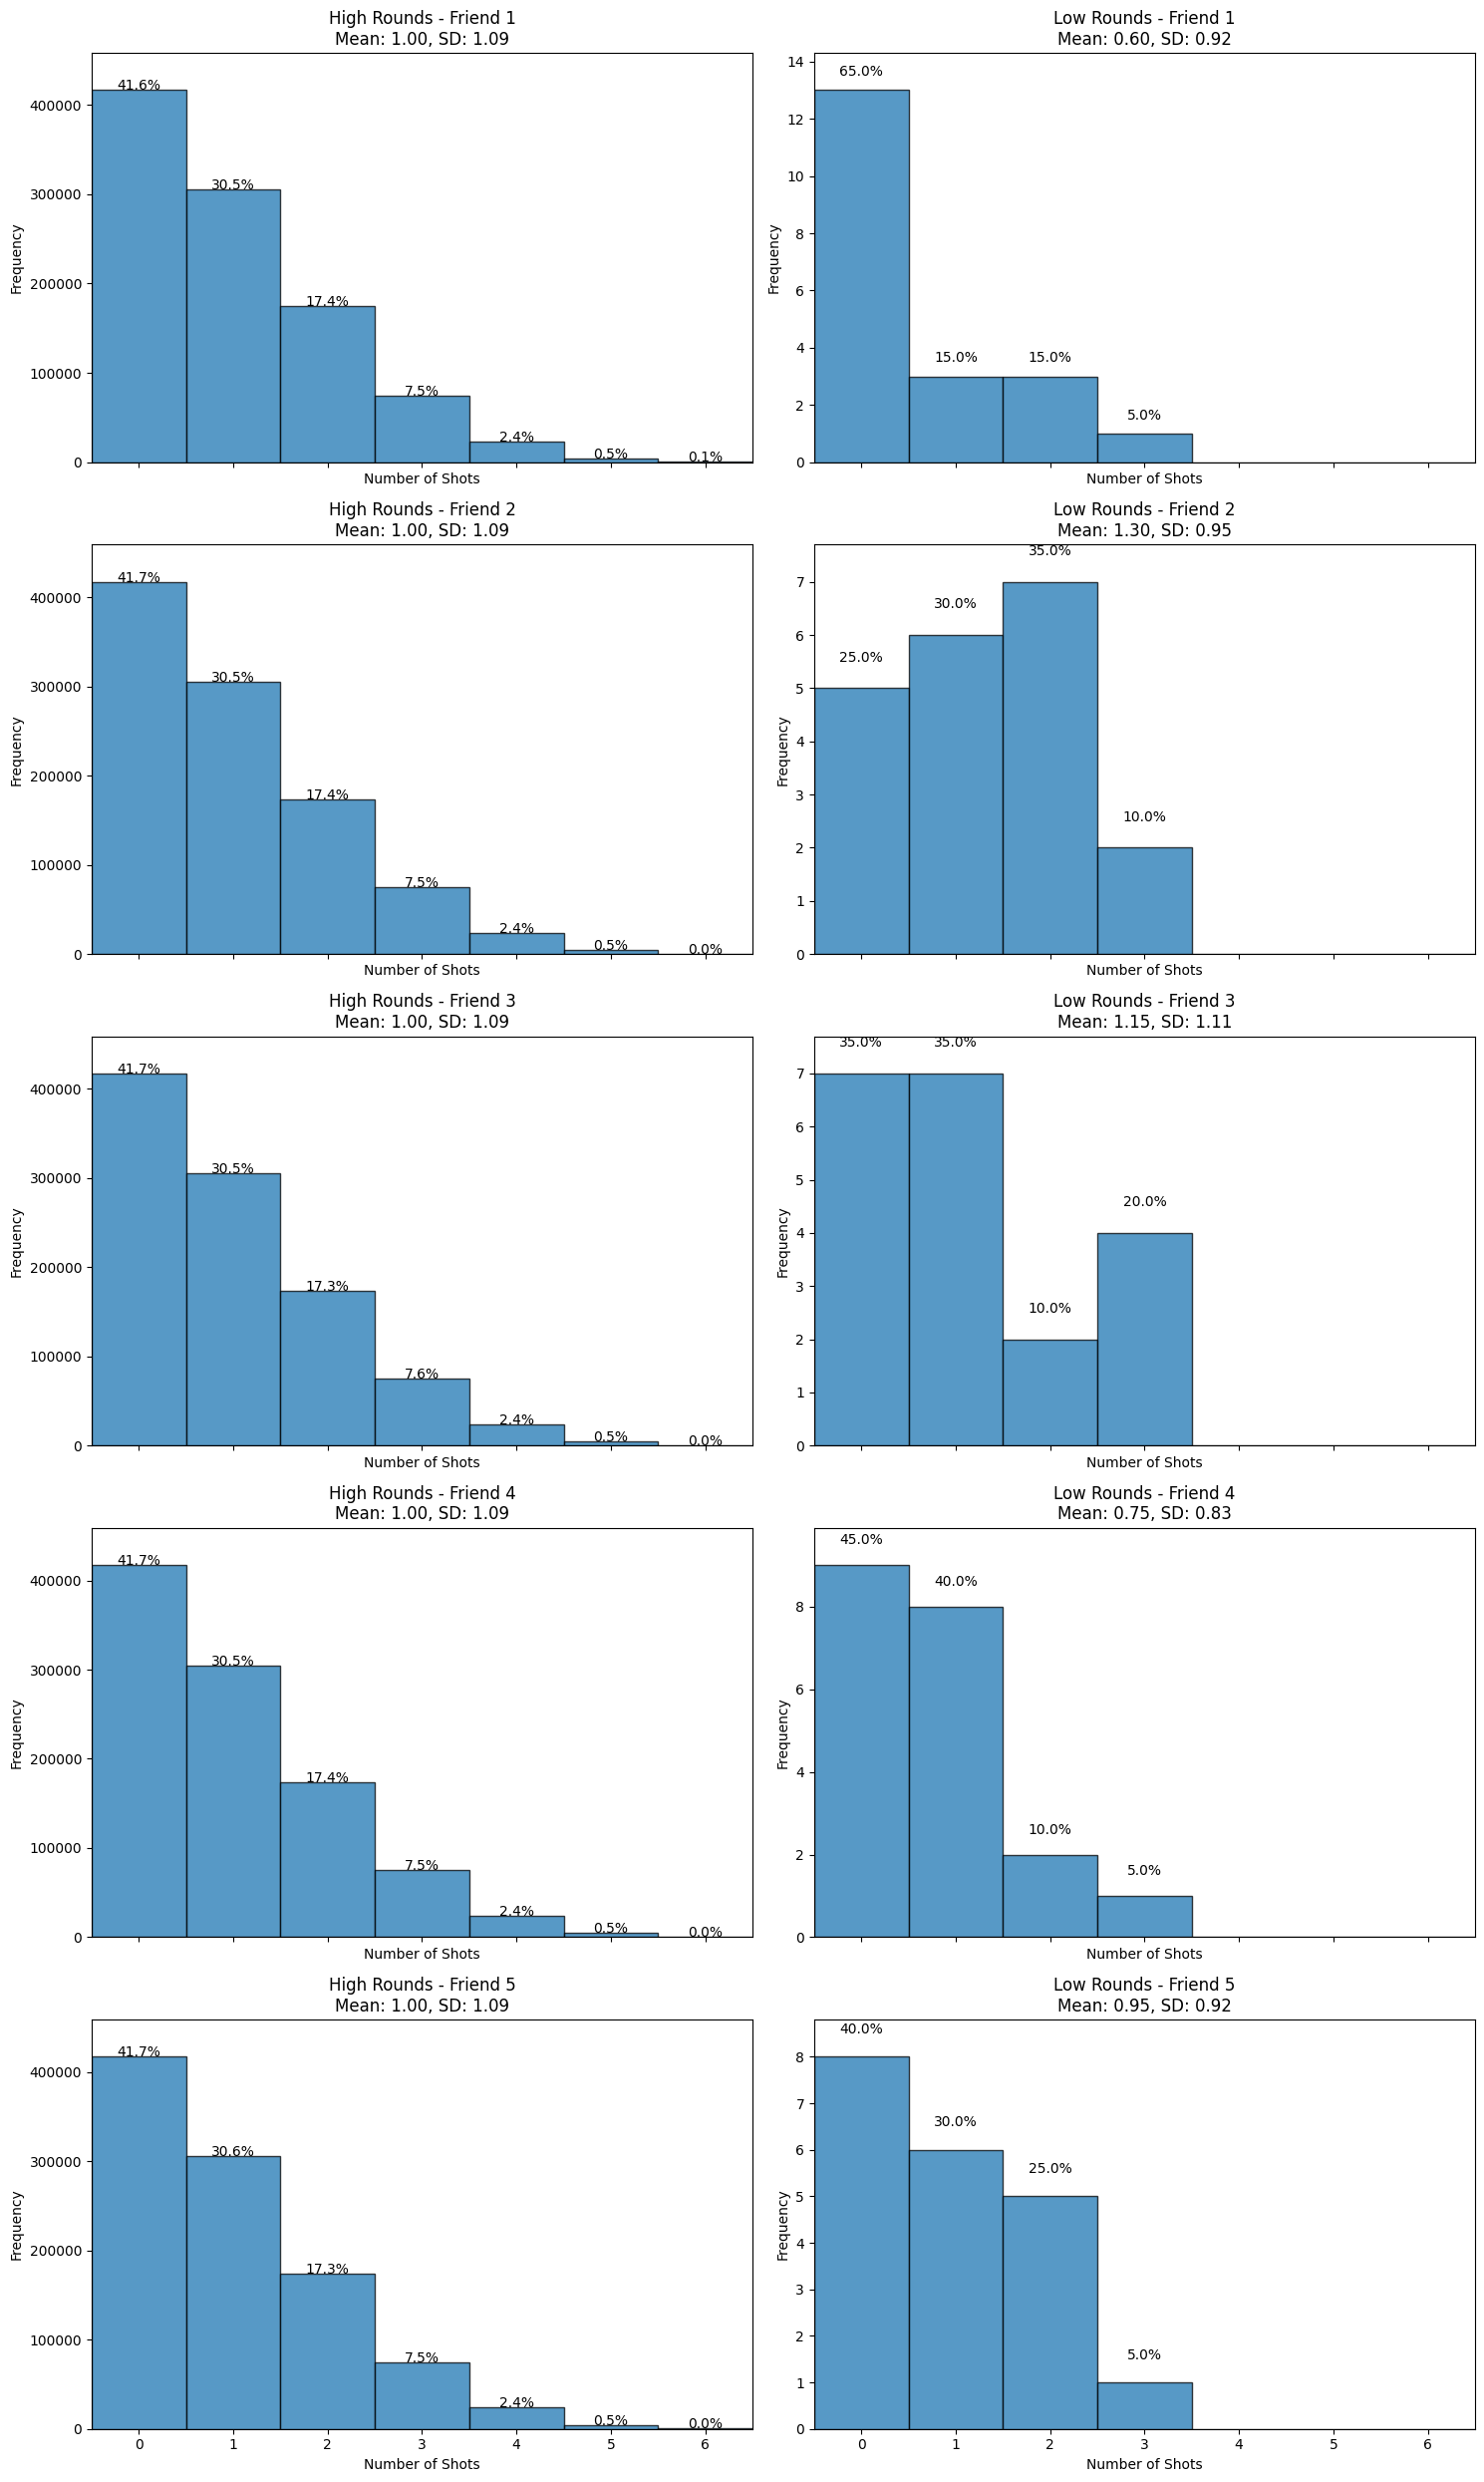

Calculating standard deviation per round over simulations...


100%|██████████| 200/200 [00:24<00:00,  8.20it/s]


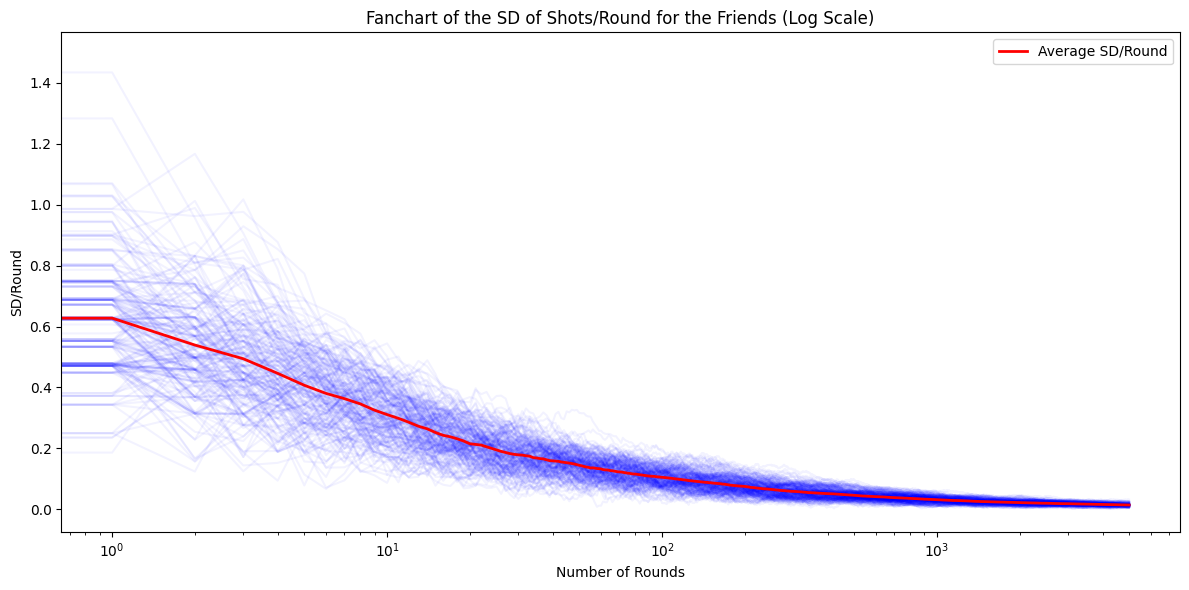

Calculating average shots per turn per friend over simulations...


100%|██████████| 1000/1000 [00:10<00:00, 97.77it/s]


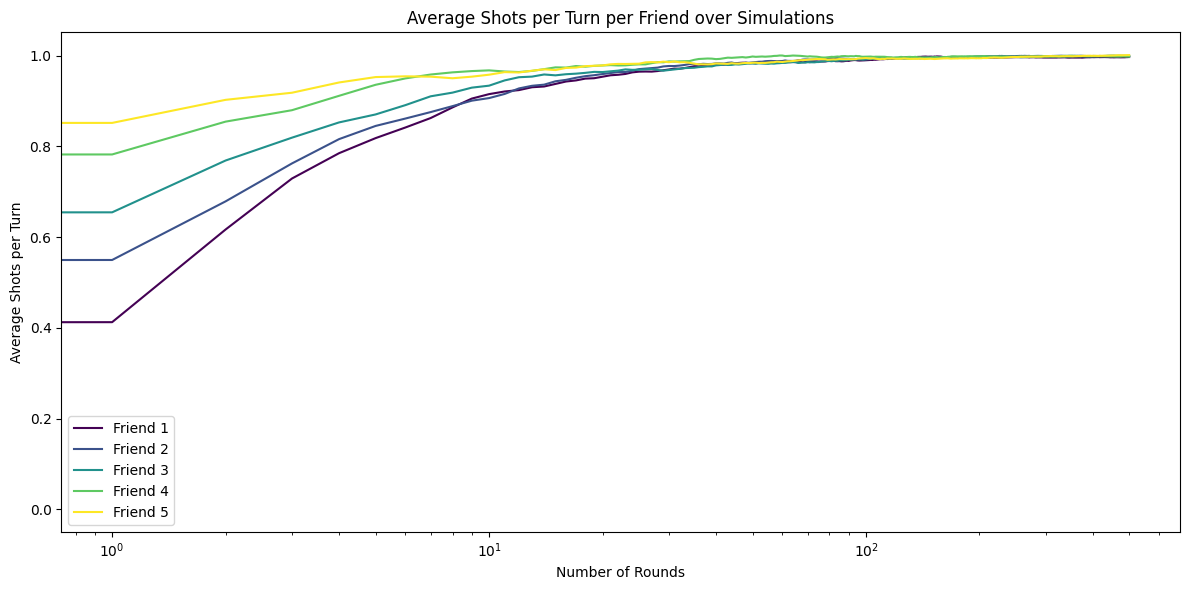

In [14]:
def main():
    # Example Simulation: 10 rounds and 10 friends
    print("Example simulation with 10 friends over 10 rounds:")
    example_shots = simulate_game(10, 10)
    print(example_shots)

    # Simulate the game for 5 friends with high and low number of rounds
    n_friends = 5
    shots_matrix_high = simulate_game(n_friends, n_turns=1000000)
    shots_matrix_low = simulate_game(n_friends, n_turns=20)

    # Plot individual histograms for both high and low rounds
    plot_individual_histograms(shots_matrix_high, shots_matrix_low, n_friends)

    # Simulate SD over time and plot fanchart
    n_friends_sd = 6
    n_turns_sd = 5000
    n_simulations_sd = 200
    all_sd_per_round = simulate_sd_over_time(n_friends_sd, n_turns_sd, n_simulations_sd)
    plot_sd_fanchart(all_sd_per_round)

    # Simulate average shots per friend and plot
    n_friends_avg = 5
    n_turns_avg = 500
    n_simulations_avg = 1000
    average_mean_shots_per_round = simulate_average_shots_per_friend(n_friends_avg, n_turns_avg, n_simulations_avg)
    plot_average_shots_per_friend(average_mean_shots_per_round, n_friends_avg)


if __name__ == "__main__":
    main()
